In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
image = np.vstack([np.zeros((2,5)),np.ones((3,5))])
image

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
kernel = np.array([[1,2],[-1,-2]],dtype=np.float32)

In [ ]:
kernel.shape

(2, 2)

In [ ]:
image=image.reshape(1,5,5,1) #1 btch,5*5 ka image,1 channel hai
kernel=kernel.reshape(2,2,1,1)#2*2 image

In [ ]:
image_edge = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding = 'VALID',
)
image_edge.numpy().reshape((4,4))

array([[ 0.,  0.,  0.,  0.],
       [-3., -3., -3., -3.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

#Convolutional_operator real image

In [ ]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')/255
flower = load_sample_image('flower.jpg')/255

images = np.array([china,flower])

In [ ]:
batch,height,width,channels = images.shape #batch size,hight,width,channels

In [ ]:
images.shape

(2, 427, 640, 3)

In [ ]:
filters = np.random.rand(7,7,channels,1) #output channel 1

In [ ]:
image_edge = tf.nn.conv2d(
    input=images,
    filters=filters,
    strides=1,
    padding = 'VALID',
)

In [ ]:
url ='https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Valve_original_%281%29.PNG/450px-Valve_original_%281%29.PNG'

In [ ]:
file_path = tf.keras.utils.get_file(origin = url)
file_path

'/root/.keras/datasets/450px-Valve_original_%281%29.PNG'

In [ ]:
image = tf.io.read_file(file_path)

In [ ]:
image = tf.io.decode_jpeg(image,channels=1)

In [ ]:
images  = tf.reshape(image,[1,*image.shape])/255


In [ ]:

images.shape

TensorShape([1, 338, 450, 1])

In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/Valve_original_(1).PNG')

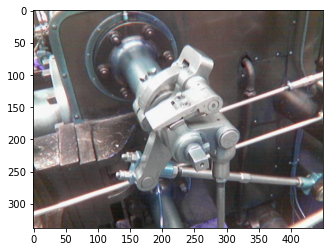

In [ ]:
plt.imshow(img,cmap='gray')

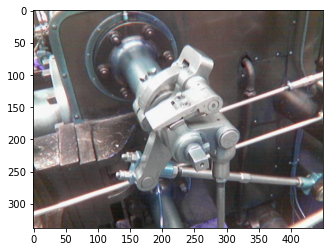

In [ ]:
#laplacian = cv2.laplacian(img,cv2.CV_64F)
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
from matplotlib import pyplot as plt
plt.imshow(img,cmap='gray')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


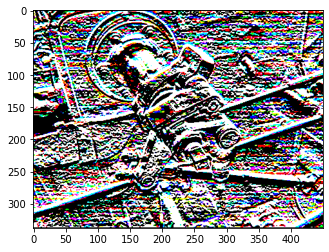

In [ ]:
plt.imshow(sobely,cmap='gray')

In [ ]:
kernel = np.zeros((5,5, 1, 1))

In [ ]:
image_filter = tf.nn.conv2d(
    input=images,
    filters=kernel,
    strides=1,
    padding='SAME'
)

In [ ]:
print('conv2d shape', image_filter.shape)

conv2d shape (1, 338, 450, 1)


In [ ]:
image_detect = tf.nn.relu(image_filter)
print('relu shape', image_detect.shape)

relu shape (1, 338, 450, 1)


In [ ]:
img_conv = tf.nn.max_pool2d(image_detect, ksize=(3,3), strides=(1,1), padding = 'SAME')
print('Pool shape', img_conv.shape)

Pool shape (1, 338, 450, 1)


Text(0.5, 1.0, 'maxpool')

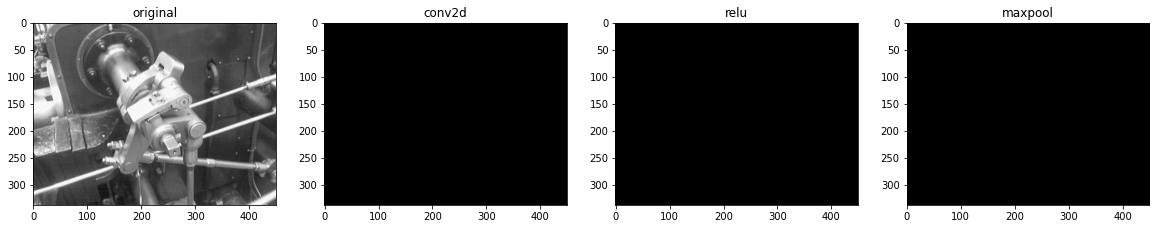

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.imshow(tf.squeeze(image), cmap='gray')
plt.title('original')

plt.subplot(1, 4, 2)
plt.imshow(tf.squeeze(image_filter), cmap='gray')
plt.title('conv2d')

plt.subplot(1, 4, 3)
plt.imshow(tf.squeeze(image_detect), cmap='gray')
plt.title('relu')

plt.subplot(1,4,4)
plt.imshow(tf.squeeze(img_conv), cmap='gray')
plt.title('maxpool')
